> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (FBI Gun data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will use the data collected by FBI via **National Instant Criminal Backgoround Check System** (NICS). The FBI provides data on the number of firearm checks by month, state, and type. This project leverages data directly provided by *Udacity.com*. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this
system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. We will be leveraging following two datasets in for this analysis - 

 - **FBI gun data:** An excel spreadsheet with monthly data for guns registered in the U.S. 
 - **US Census:** A .csv file with US Census data 

### Questions to explore:

     1) State where highest number of guns were registered
     2) Gun purchase trend over period
     3) Correlation between Salary and Gun purchase 


> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

gun_df = pd.read_excel('gun-data.xlsx')
census_df = pd.read_csv('u.s.-census-data.csv')

In [3]:
# Get number of rows and columns in each data frame
gun_df.shape, census_df.shape

((12485, 27), (85, 52))

In [4]:
# 1) Understand gun_data
gun_df.info()

## Upon checking the data, we may need to a) select few columns for analysis, 
## b) remove rows with blank fields, c) remove duplicate rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [5]:
# 2) Quick data profile on gun data
gun_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [6]:
# 3) Get information on Census data
census_df.info()

## Based on the results it appears that the data for each state is laid out horizontally, we may need to transpose 
## this table with required fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [7]:
# 4) Get quick profile on Census data
census_df.describe()

# Did not yield any useful results, as all the features are in string format. We may need to cleanup these later.

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,(c),(c),69.30%,7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,0.065,0.048,50.40%,2.50%,"625,741",7.70%,"7,288,000",1.50%,6.60%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [8]:
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [9]:
census_df.tail(25)

## It appears that towards the end of datasets, there are few informational lines, we will need to get rid of those
## during data cleanup.

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
Based on data assessment above, we will have to take following high-level steps:
 - **FBI Gun data:**
     - a) remove duplicates rows
     - b) address NaNs
     - c) convert all floats columns to int
     - d) standardize the month as 1st of the given month 

 - **Census data:**
     - a) transpose the table
     - b) select required rows

#### FBI Gun Data Cleanup

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# FBI Gun data cleanup 
# Check for duplicated rows
sum(gun_df.duplicated())

0

In [11]:
# No duplicate rows noted, no need to dedup the dataframe
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [12]:
# Standardize month as calendar date
# Add "-01" after each month field
gun_df['month'] = gun_df['month'] + "-01"

In [13]:
# Check the state of dataframe 
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [14]:
# Convert month column to date
gun_df['month'] = pd.to_datetime(gun_df['month'])

In [15]:
# Check for column conversion
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null datetime64[ns]
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_

In [16]:
#add column for year, first check if month column is populated everywhere
gun_df['month'].isna().sum()

0

In [17]:
gun_df['year'] = gun_df['month'].dt.year

In [18]:
# Lets replace the NaNs for numeric columns with mean of the given year
cols_to_convert = gun_df.columns[2:26]

for c in cols_to_convert:
    c_mean = pd.DataFrame({'mean_val':gun_df.groupby('year')[c].mean()}).reset_index()
    c_mean.fillna(0.00, inplace=True)
    gun_df = gun_df.merge(right=c_mean, left_on='year', right_on='year', how='left')
    gun_df[c] = gun_df.apply(lambda row: row['mean_val'] if np.isnan(row[c]) else row[c], axis= 1)
    gun_df.drop(columns=['mean_val'], axis=1, inplace=True)

In [19]:
# confirm if NaN columns exist in the dataframe
gun_df.isna().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
year                         False
dtype: bool

In [20]:
# convert all floats to int

for c in cols_to_convert:
    gun_df[c] = gun_df[c].astype(int)

In [21]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 28 columns):
month                        12485 non-null datetime64[ns]
state                        12485 non-null object
permit                       12485 non-null int64
permit_recheck               12485 non-null int64
handgun                      12485 non-null int64
long_gun                     12485 non-null int64
other                        12485 non-null int64
multiple                     12485 non-null int64
admin                        12485 non-null int64
prepawn_handgun              12485 non-null int64
prepawn_long_gun             12485 non-null int64
prepawn_other                12485 non-null int64
redemption_handgun           12485 non-null int64
redemption_long_gun          12485 non-null int64
redemption_other             12485 non-null int64
returned_handgun             12485 non-null int64
returned_long_gun            12485 non-null int64
returned_other               12

In [22]:
# Update total column as sum total of other permits
cols = gun_df.columns[2:26]

gun_df['totals_updated'] = 0

for c in cols:
    gun_df['totals_updated'] += gun_df[c]

In [23]:
gun_df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,totals_updated
0,2017-09-01,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017,32019
1,2017-09-01,Alaska,209,2,2320,2930,219,160,0,5,...,0,17,24,1,0,0,0,6303,2017,6303
2,2017-09-01,Arizona,5069,382,11063,7946,920,631,0,13,...,0,38,12,2,0,0,0,28394,2017,28394
3,2017-09-01,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,13,23,0,0,2,1,17747,2017,17747
4,2017-09-01,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,123506,2017,123506
5,2017-09-01,Colorado,4356,0,15751,13448,1007,1062,0,0,...,0,0,0,0,0,0,0,35873,2017,35873
6,2017-09-01,Connecticut,4343,673,4834,1993,274,0,0,0,...,0,0,0,0,0,0,0,12117,2017,12117
7,2017-09-01,Delaware,275,0,1414,1538,66,68,0,0,...,0,55,34,3,1,2,0,3502,2017,3502
8,2017-09-01,District of Columbia,1,0,56,4,0,0,0,0,...,0,0,0,0,0,0,0,61,2017,61
9,2017-09-01,Florida,10784,0,39199,17949,2319,1721,1,18,...,0,11,9,0,0,1,0,77390,2017,77390


#### Census Data Cleanup

In [24]:
# Remove unnecessary rows from tail
census_df = census_df[:65]

In [25]:
census_df_original = census_df

In [26]:
# Get only rows for July 1, 2016
census_df= census_df[census_df['Fact'].str.contains("\(V2016\)")]

In [27]:
#Add per capita line
census_df= census_df.append(census_df_original[census_df_original['Fact'].str.contains("Per capita income in past 12 months")], 
                 ignore_index=True)

census_df= census_df.append(census_df_original[census_df_original['Fact'].str.contains("Median household income")], 
                 ignore_index=True)


In [28]:
census_df.shape

(18, 52)

In [29]:
# remove "Fact Note" column
census_df.drop(columns=['Fact Note'], inplace=True)

In [30]:
census_df.shape

(18, 51)

In [31]:
# clear the string July 1, 2016 from all as we know all data pertains to 2016
#census_df['Fact'].replace(", July 1, 2016,  (V2016)", "", inplace=True)

census_df['Fact']= census_df['Fact'].str.replace(", July 1, 2016,  \(V2016\)", "")

In [32]:
census_df.iloc[1,0]
census_df['Fact']= census_df['Fact'].str.replace(", April 1, 2010,  \(V2016\)", " prior")

In [33]:
census_df.iloc[5,0]

'Persons 65 years and over, percent,  July 1, 2016,  (V2016)'

In [34]:
census_df['Fact']= census_df['Fact'].str.replace(",  July 1, 2016,  \(V2016\)", "")

In [35]:
census_df.iloc[2,0]

'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'

In [36]:
census_df['Fact']= census_df['Fact'].str.replace(" - April 1, 2010 \(estimates base\) to July 1, 2016,  \(V2016\)", "")
census_df['Fact'] = census_df['Fact'].str.replace("Per capita income in past 12 months \(in 2015 dollars\), 2011-2015"
                                                  , "per_capita_income_2015")
census_df['Fact'] = census_df['Fact'].str.replace("Median household income \(in 2015 dollars\), 2011-2015"
                                                  , "median_household_income_2015")

In [37]:
census_df.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,Population estimates base prior,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Persons under 5 years, percent",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
4,"Persons under 18 years, percent",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%


In [38]:
# Transpose the table to have states vertically
census_df= census_df.set_index('Fact').T

In [39]:
census_df.head()

Fact,Population estimates,Population estimates base prior,"Population, percent change","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent","Native Hawaiian and Other Pacific Islander alone, percent","Two or More Races, percent","Hispanic or Latino, percent","White alone, not Hispanic or Latino, percent",Housing units,per_capita_income_2015,median_household_income_2015
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","$24,091","$43,623"
Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658","$33,413","$72,515"
Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003","$25,848","$50,255"
Arkansas,"2,988,248","2,916,025",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762","$22,798","$41,371"
California,"39,250,017","37,254,522",5.40%,6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,"14,060,525","$30,318","$61,818"


In [40]:
# change the column names to remove , and spaces
cols= census_df.columns
new_cols= {}

for c in cols:
    new_cols[c] = c.replace(",", "").replace(" ", "_").lower()

In [41]:
census_df.rename(columns=new_cols, inplace= True)

In [42]:
census_df.head()

Fact,population_estimates,population_estimates_base_prior,population_percent_change,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hispanic_or_latino_percent,white_alone_not_hispanic_or_latino_percent,housing_units,per_capita_income_2015,median_household_income_2015
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","$24,091","$43,623"
Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658","$33,413","$72,515"
Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003","$25,848","$50,255"
Arkansas,"2,988,248","2,916,025",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762","$22,798","$41,371"
California,"39,250,017","37,254,522",5.40%,6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,"14,060,525","$30,318","$61,818"


In [43]:
#I encountered error while executing code in the cell below, because one of the column as a value of Z. Let's replace it 
# with 0.0
cols = census_df.columns

for c in cols:
    census_df[c]= census_df[c].str.replace("Z", "0.0")


In [44]:
census_df.head()

Fact,population_estimates,population_estimates_base_prior,population_percent_change,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hispanic_or_latino_percent,white_alone_not_hispanic_or_latino_percent,housing_units,per_capita_income_2015,median_household_income_2015
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","$24,091","$43,623"
Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658","$33,413","$72,515"
Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003","$25,848","$50,255"
Arkansas,"2,988,248","2,916,025",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762","$22,798","$41,371"
California,"39,250,017","37,254,522",5.40%,6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,"14,060,525","$30,318","$61,818"


In [45]:
# Wow it appears that for some of the states the data is incosistent, e.g. New Mexico the numbers are missing % sign. 
# To address this, I'm going to remove all % signs and divide them by 100

cols = census_df.columns[census_df.columns.str.contains("percent")]

for c in cols:
    #print(c)
    census_df[c]= census_df[c].apply(lambda x: float(x.replace("%",""))/100 if x.find("%") else float(x))

In [46]:
census_df.head()

Fact,population_estimates,population_estimates_base_prior,population_percent_change,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hispanic_or_latino_percent,white_alone_not_hispanic_or_latino_percent,housing_units,per_capita_income_2015,median_household_income_2015
Alabama,"4,863,300","4,780,131",0.017,0.060,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,"2,230,185","$24,091","$43,623"
Alaska,"741,894","710,249",0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,"310,658","$33,413","$72,515"
Arizona,"6,931,071","6,392,301",0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,"2,961,003","$25,848","$50,255"
Arkansas,"2,988,248","2,916,025",0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,"1,354,762","$22,798","$41,371"
California,"39,250,017","37,254,522",0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,"14,060,525","$30,318","$61,818"


In [47]:
# Change the first 2 columns to float
census_df['population_estimates']= census_df['population_estimates'].str.replace(",", "").astype(float)
census_df['population_estimates_base_prior']= census_df['population_estimates_base_prior'].str.replace(",", "").astype(float)
census_df['housing_units']= census_df['housing_units'].str.replace(",", "").astype(float)
census_df['per_capita_income_2015']= census_df['per_capita_income_2015'].str.replace(",", "")
census_df['per_capita_income_2015']= census_df['per_capita_income_2015'].str.replace("$", "").astype(float)
census_df['median_household_income_2015']= census_df['median_household_income_2015'].str.replace(",", "")
census_df['median_household_income_2015']= census_df['median_household_income_2015'].str.replace("$", "").astype(float)

In [48]:
#perfectly cleaned Census data
census_df.head()

Fact,population_estimates,population_estimates_base_prior,population_percent_change,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hispanic_or_latino_percent,white_alone_not_hispanic_or_latino_percent,housing_units,per_capita_income_2015,median_household_income_2015
Alabama,4863300.0,4780131.0,0.017,0.060,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,2230185.0,24091.0,43623.0
Alaska,741894.0,710249.0,0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,310658.0,33413.0,72515.0
Arizona,6931071.0,6392301.0,0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,2961003.0,25848.0,50255.0
Arkansas,2988248.0,2916025.0,0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,1354762.0,22798.0,41371.0
California,39250017.0,37254522.0,0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,14060525.0,30318.0,61818.0


In [49]:
# delete original copy of dataframe
del census_df_original

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:  State where highest number of guns permits were registered in 2006 v/s 2016?

In [50]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Quick Stats on 2016 gun permits, sales etc.
gun_df[gun_df['year']== 2016].describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,totals_updated
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,...,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.0,660.000000
mean,16870.683333,858.265152,12250.754545,9073.501515,888.086364,390.489394,5.100000,3.974242,3.889394,0.243939,...,0.031818,22.062121,16.730303,1.572727,0.548485,0.630303,0.107576,41553.806061,2016.0,41625.306061
std,43962.328099,7256.236714,14333.189656,9923.793158,3567.484454,549.652997,21.661186,7.246847,6.206478,0.625369,...,0.331300,85.235000,67.566928,5.555829,1.624662,1.722736,0.436155,57826.709125,0.0,57832.930053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,0.000000
25%,774.250000,0.000000,2441.750000,2971.500000,97.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8830.500000,2016.0,9155.000000
50%,3604.000000,0.000000,7034.500000,5931.000000,284.500000,200.500000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22212.500000,2016.0,22235.000000
75%,15769.250000,2.000000,16485.750000,12759.500000,883.000000,529.000000,0.250000,5.250000,6.000000,0.000000,...,0.000000,7.000000,7.000000,1.000000,0.000000,0.000000,0.000000,48175.750000,2016.0,48199.250000
max,358510.000000,98970.000000,72626.000000,93224.000000,77929.000000,3891.000000,205.000000,53.000000,44.000000,4.000000,...,6.000000,672.000000,585.000000,59.000000,21.000000,15.000000,4.000000,397059.000000,2016.0,397059.000000


In [51]:
# get permit details for year 2016
gun_permit_2016_df= pd.DataFrame({'total_permits':gun_df[gun_df['year']== 2016].groupby(['year', 'state'])['totals_updated']
                                  .sum()}).reset_index()
gun_permit_2016_df.sort_values(by=['total_permits'], ascending=False, inplace=True)

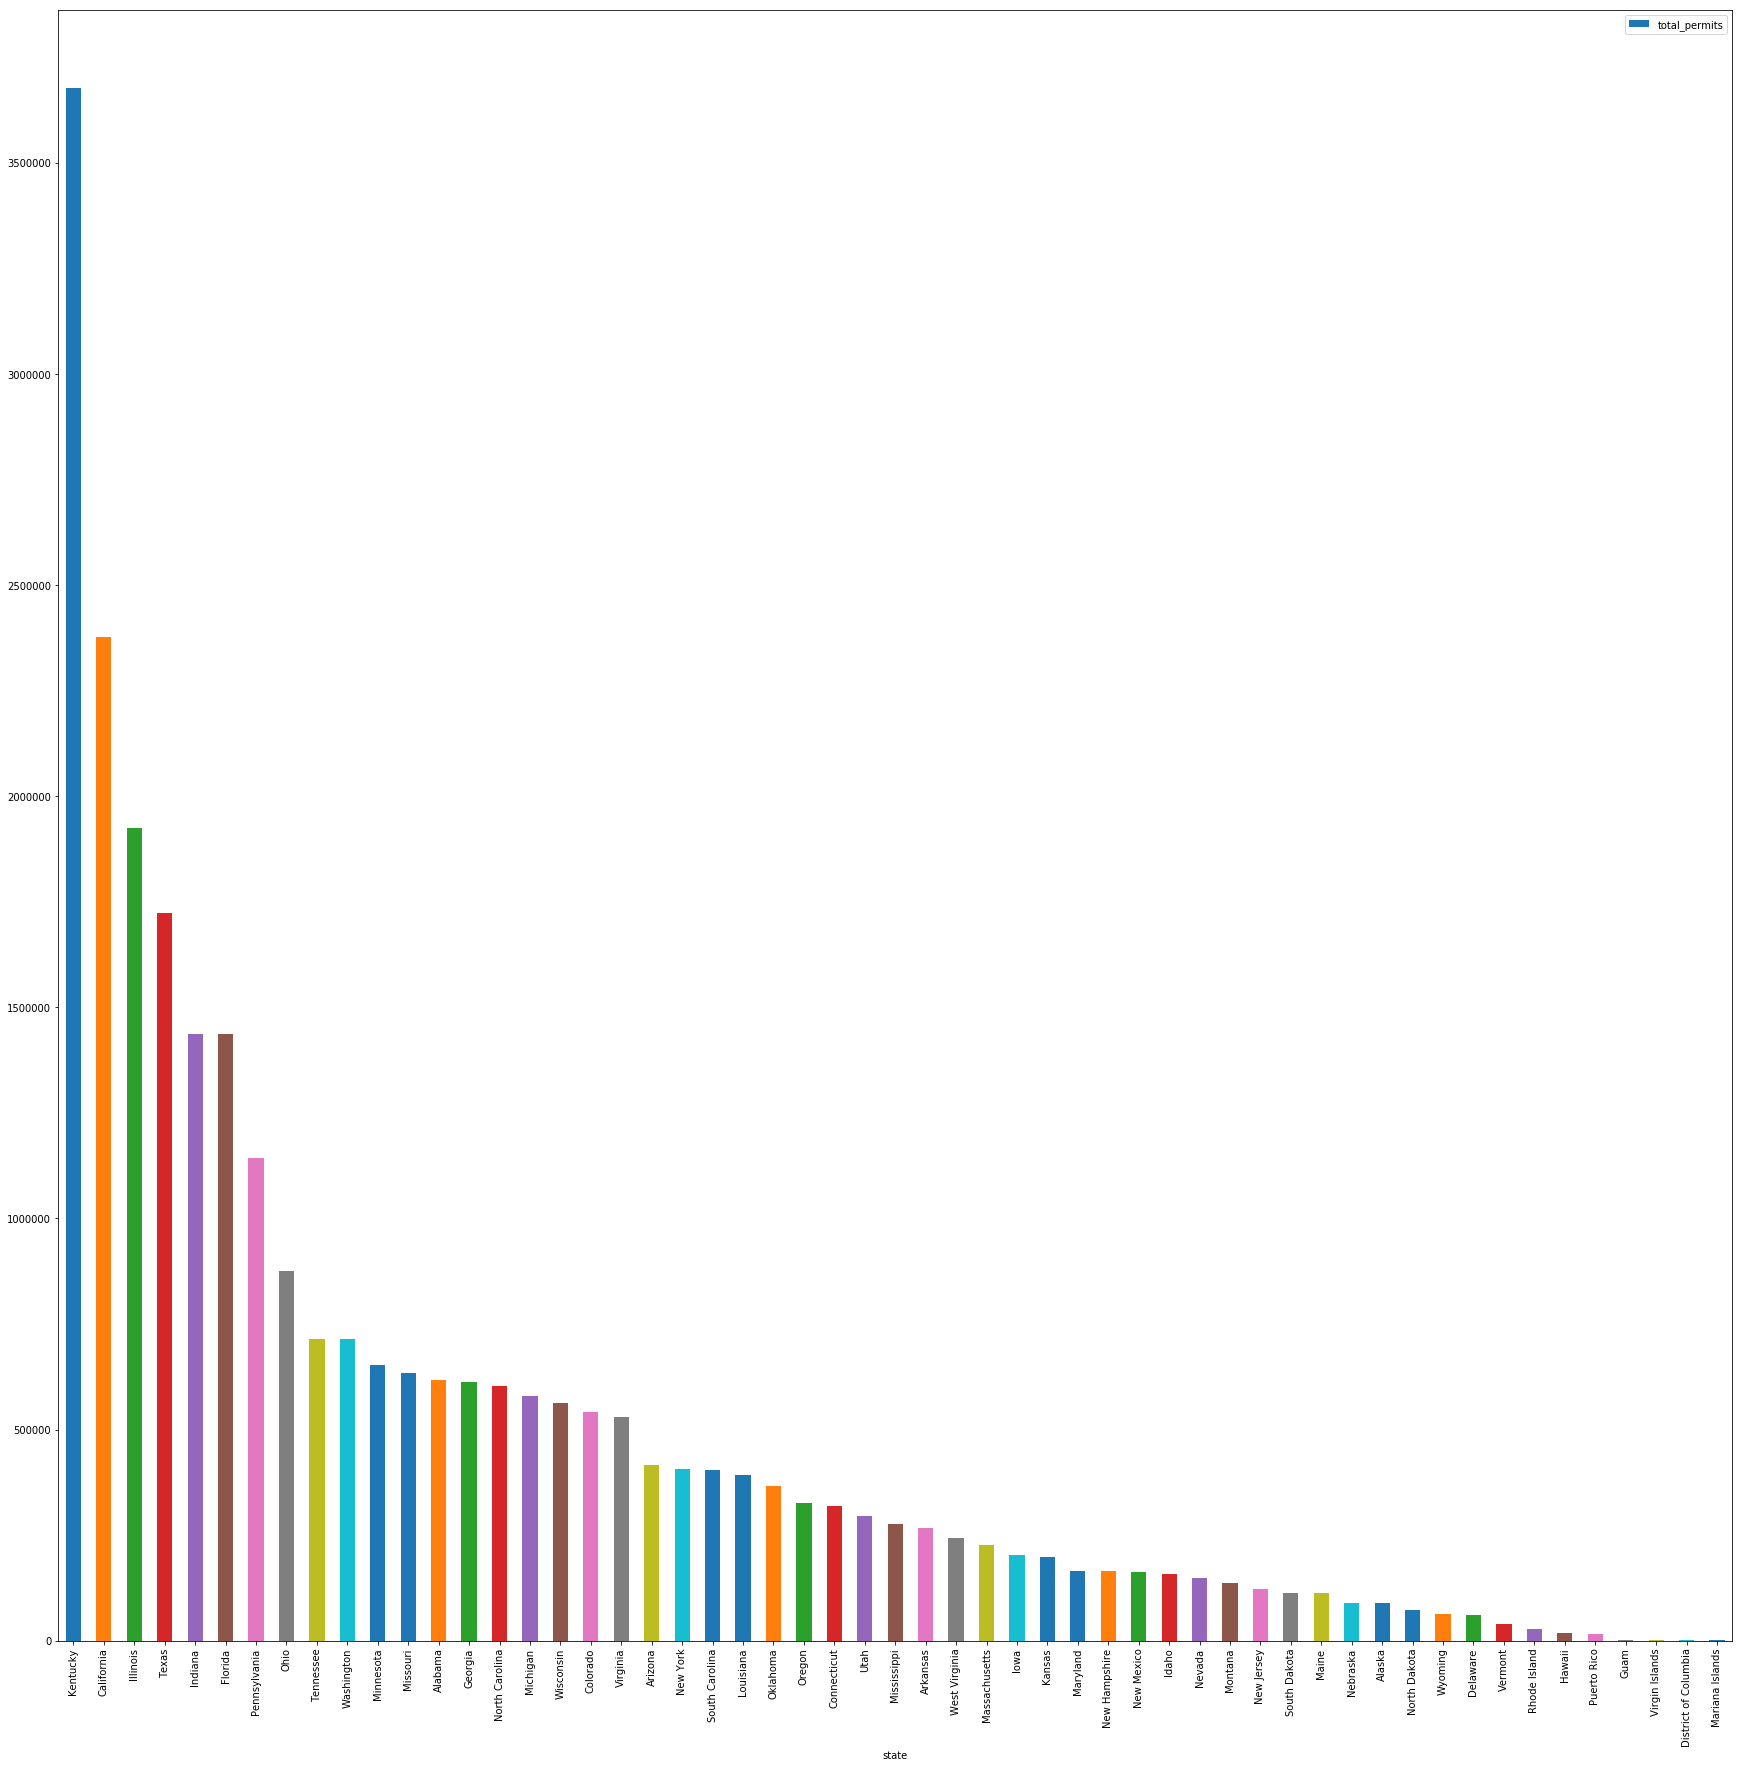

In [52]:
gun_permit_2016_df.plot('state', 'total_permits', kind='bar', figsize=(30,30));

In [53]:
gun_permit_2006_df= pd.DataFrame({'total_permits':gun_df[gun_df['year']== 2006].groupby(['year', 'state'])['totals_updated'].sum()}
                                ).reset_index()
gun_permit_2006_df.sort_values(by=['total_permits'], ascending=False, inplace=True)

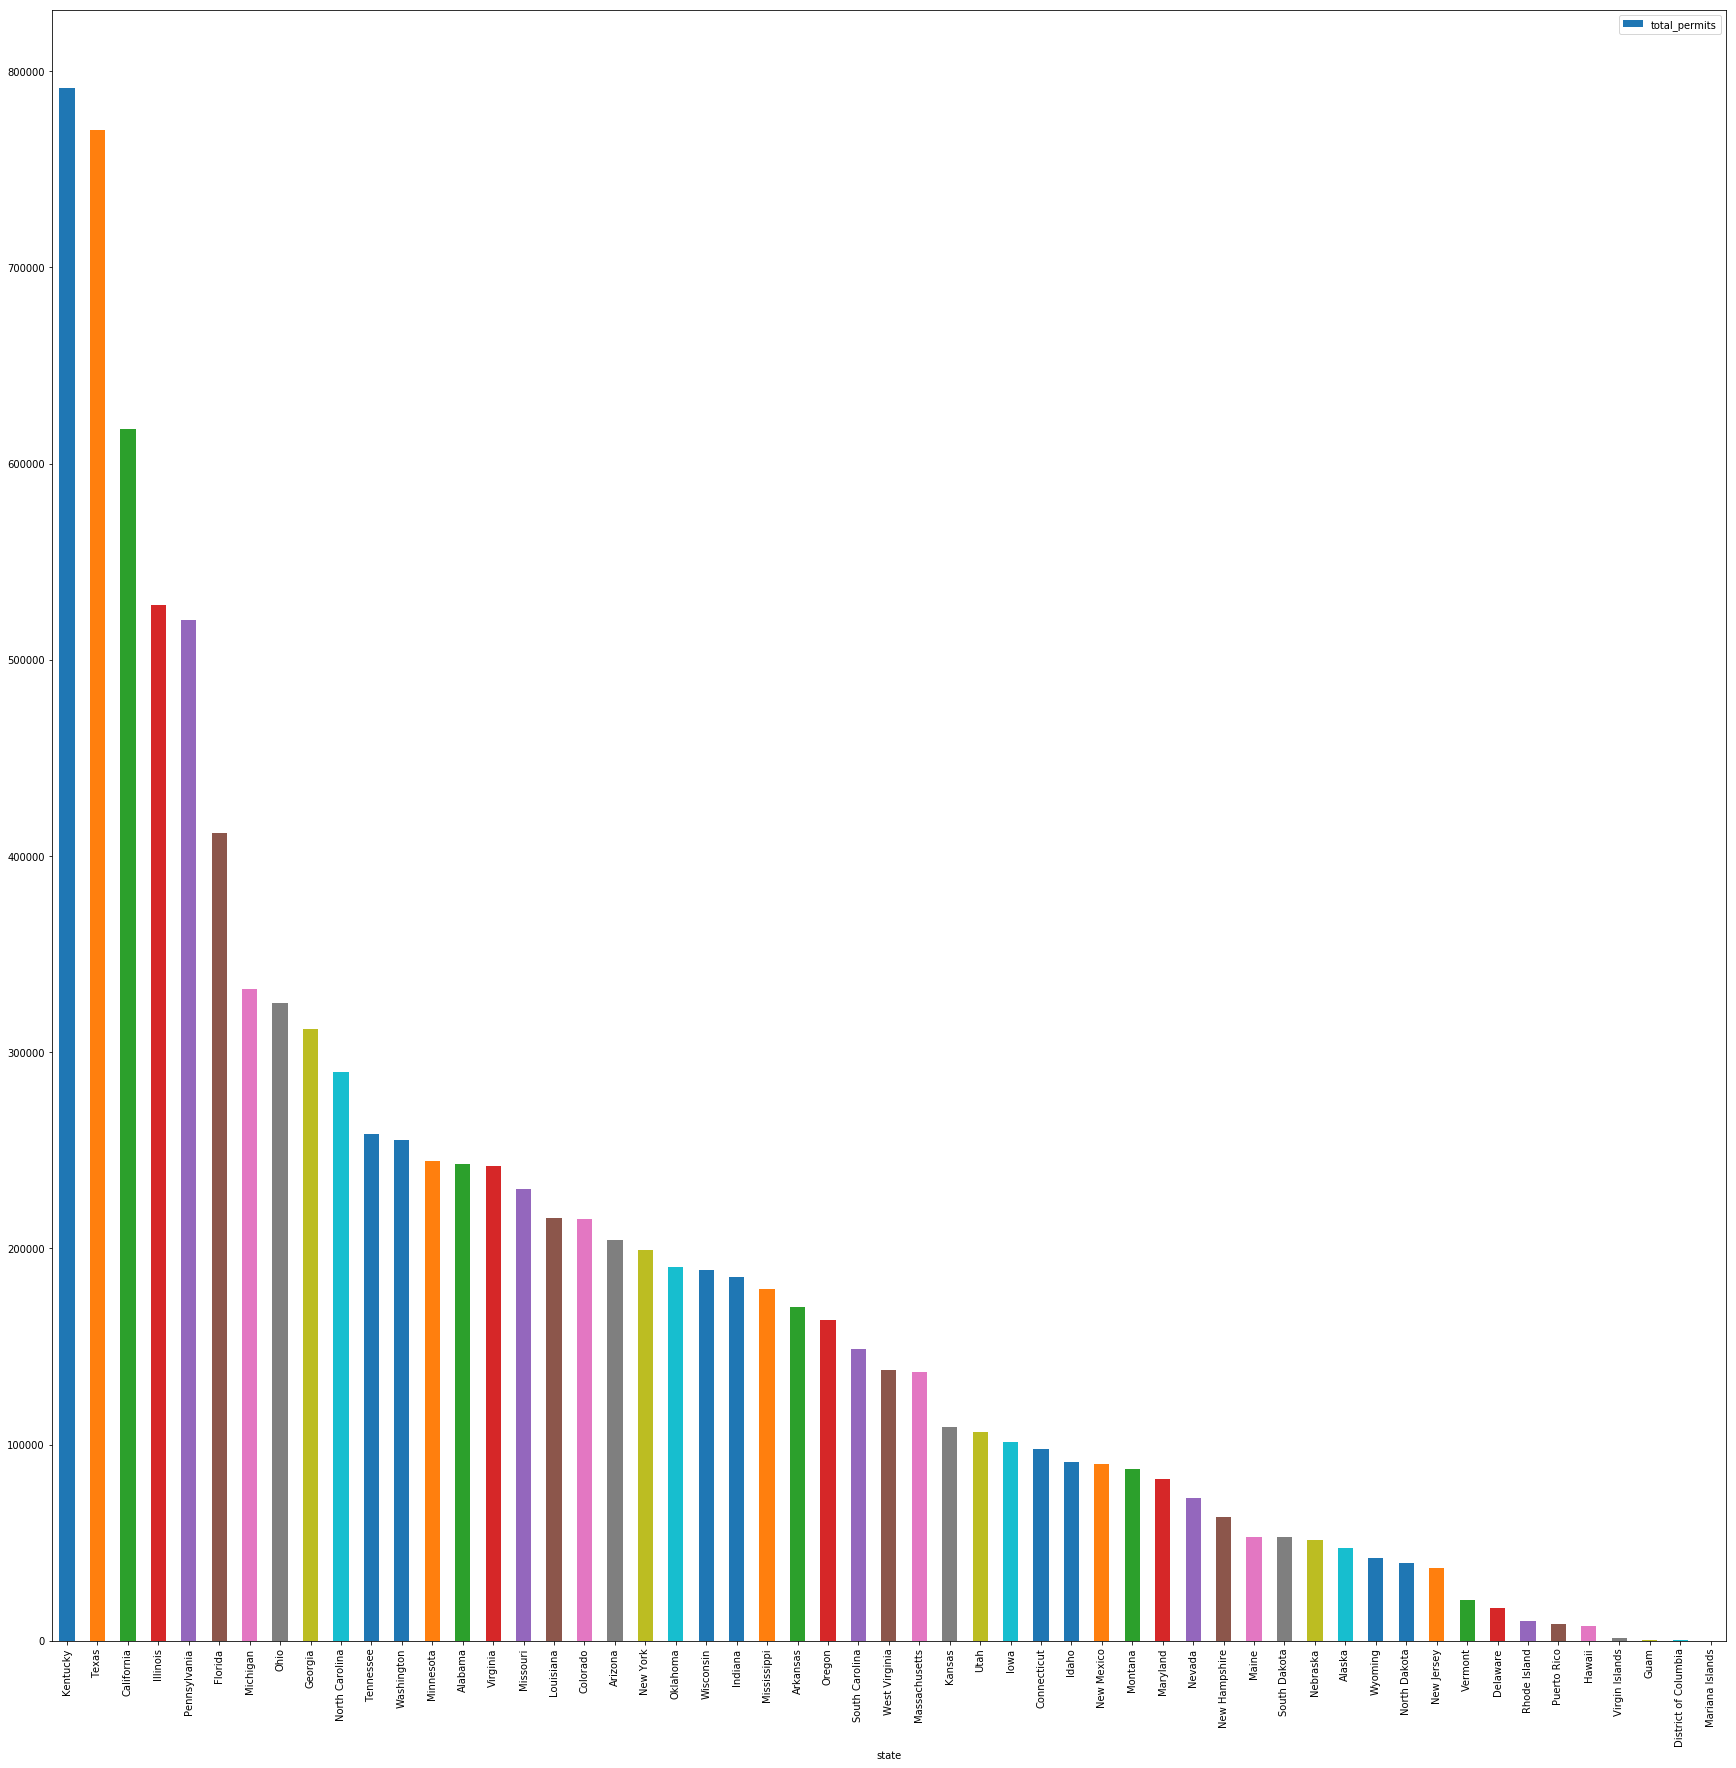

In [54]:
gun_permit_2006_df.plot('state', 'total_permits', kind='bar', figsize=(30,30));

In [55]:
## Join dataset for 2006 and 2016 to perform side by side comparison
gun_permit_2006_df.rename(columns={'total_permits':'total_permits_2006'}, inplace=True)
gun_permit_2016_df.rename(columns={'total_permits':'total_permits_2016'}, inplace=True)

In [56]:
## create a dataframe for differnce between 2016 and 2006
gun_permit_diff = gun_permit_2006_df.merge(gun_permit_2016_df, left_on='state', right_on='state', how='inner')

In [57]:
gun_permit_diff['difference'] = gun_permit_diff['total_permits_2016'] - gun_permit_diff['total_permits_2006']
gun_permit_diff.head()

,year_x,state,total_permits_2006,year_y,total_permits_2016,difference
0,2006,Kentucky,791606,2016,3677705,2886099
1,2006,Texas,770243,2016,1722584,952341
2,2006,California,617827,2016,2378025,1760198
3,2006,Illinois,527705,2016,1924928,1397223
4,2006,Pennsylvania,520461,2016,1144078,623617


In [58]:
#drop unnecessary columns
gun_permit_diff.drop(columns=['year_x', 'year_y'], inplace=True)

In [59]:
gun_permit_diff.head()

,state,total_permits_2006,total_permits_2016,difference
0,Kentucky,791606,3677705,2886099
1,Texas,770243,1722584,952341
2,California,617827,2378025,1760198
3,Illinois,527705,1924928,1397223
4,Pennsylvania,520461,1144078,623617


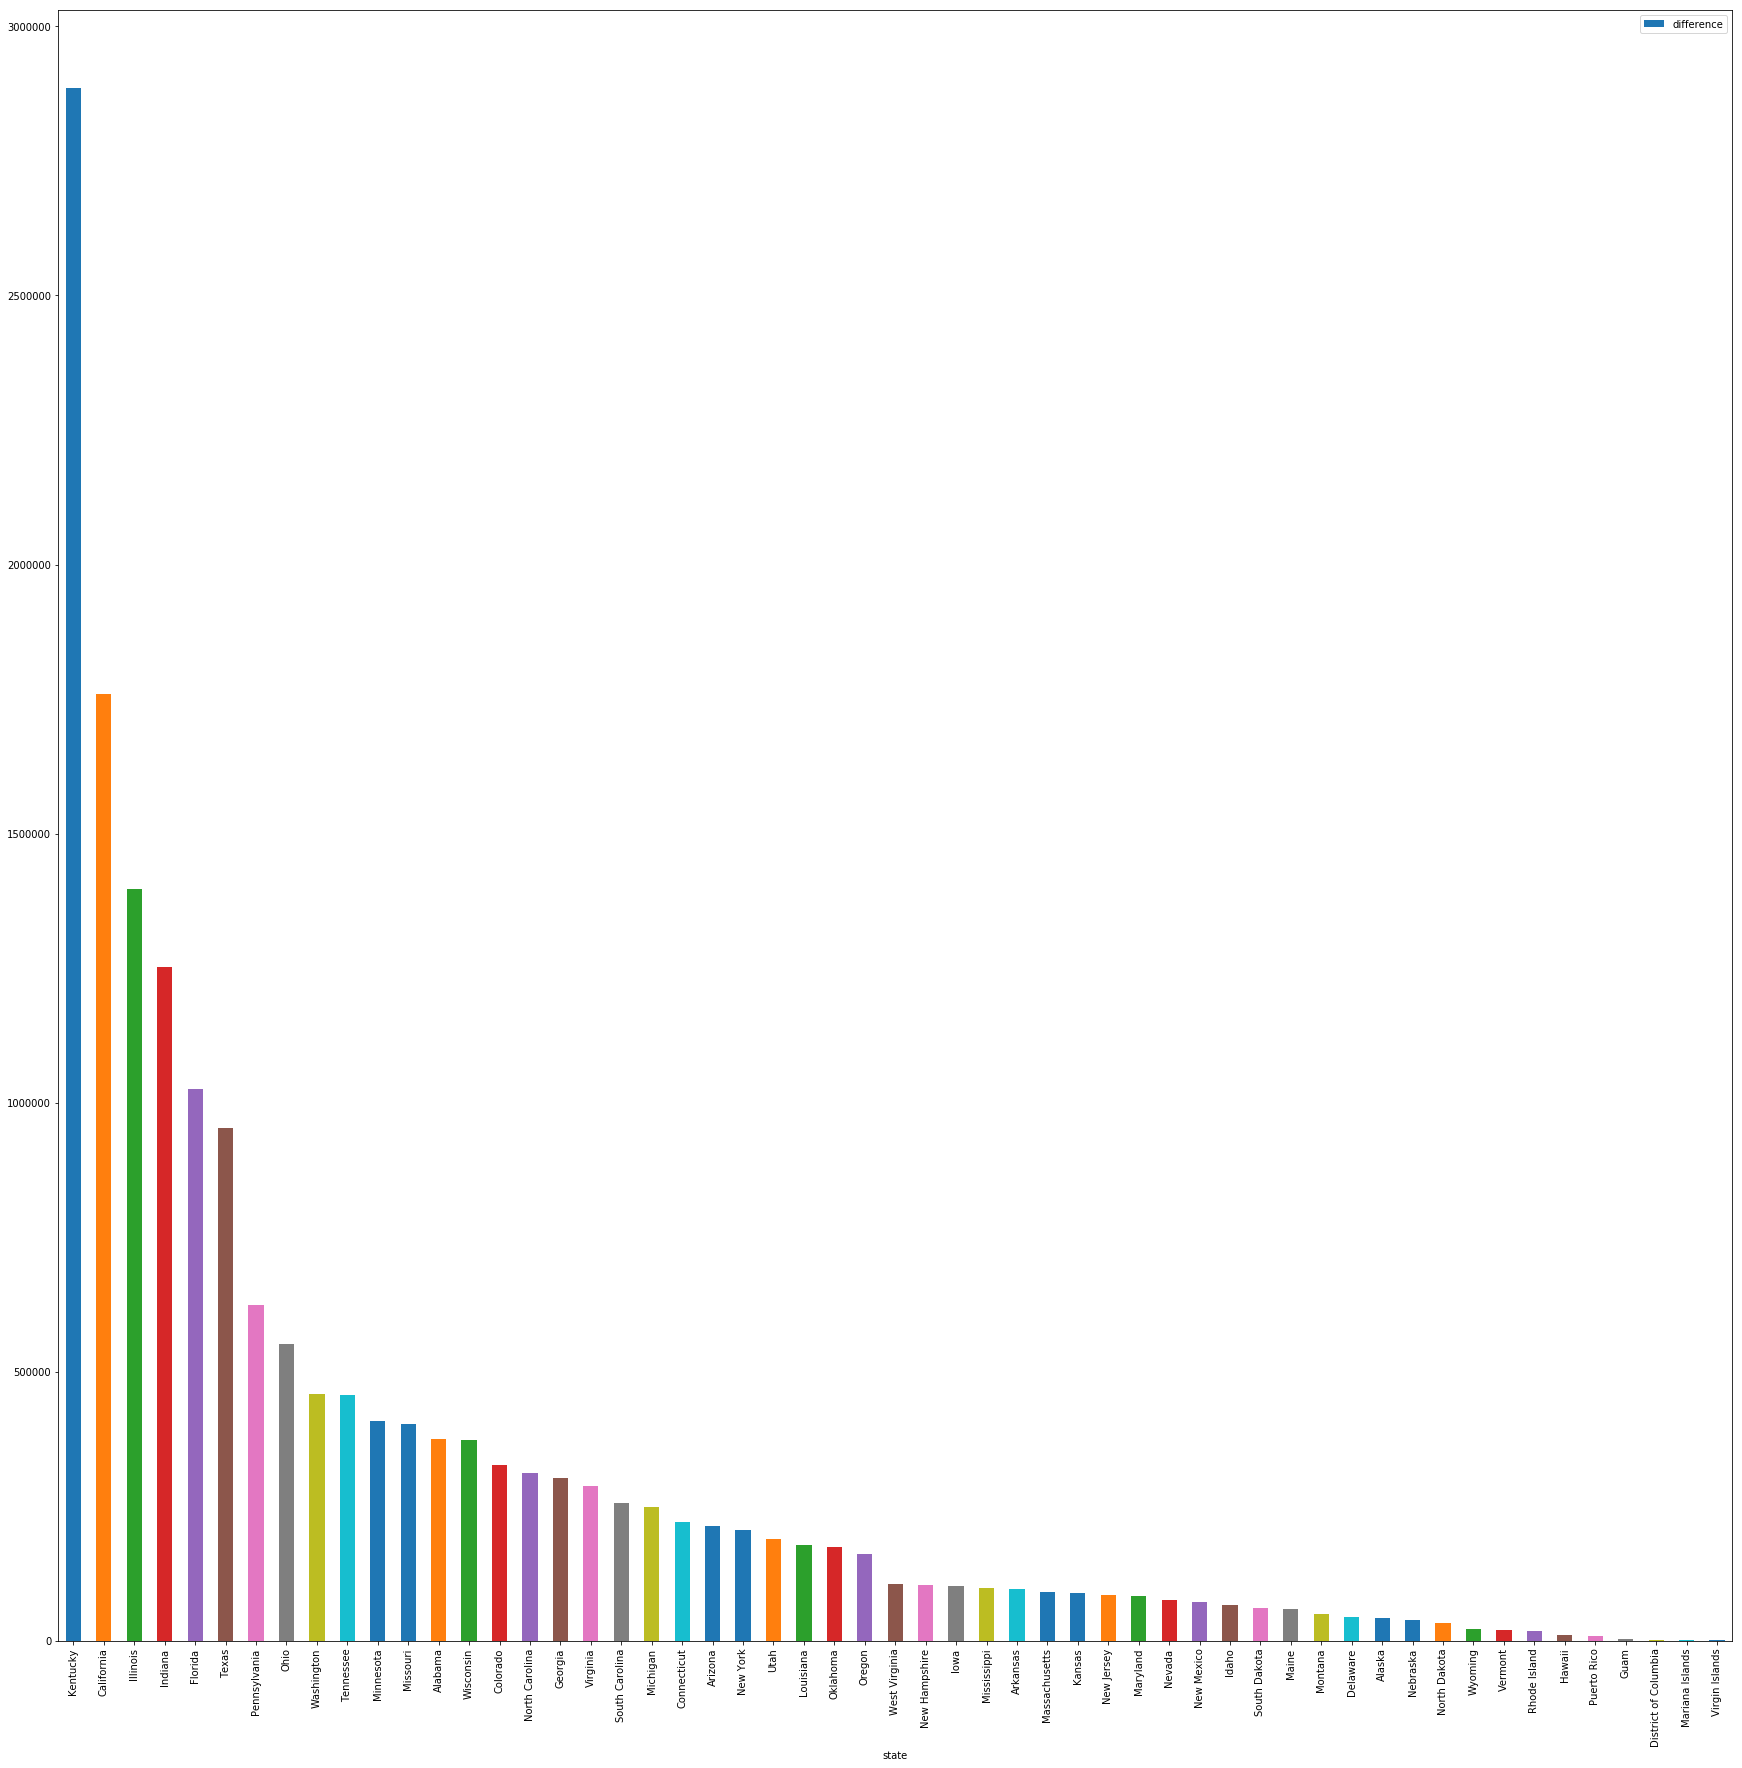

In [60]:
gun_permit_diff.sort_values(by=['difference'], ascending=False, inplace=True)
gun_permit_diff.plot('state', 'difference', kind='bar', figsize=(30, 30));

In [61]:
#state where permits went down
gun_permit_diff[gun_permit_diff['difference'] < 0]

,state,total_permits_2006,total_permits_2016,difference


In [62]:
#Increase in gun permits by percentage
gun_permit_diff['pct_diff'] = (gun_permit_diff['difference'] / gun_permit_diff['total_permits_2006'])*100
gun_permit_diff.sort_values(by=['pct_diff'], ascending=False).head()

,state,total_permits_2006,total_permits_2016,difference,pct_diff
54,Mariana Islands,33,875,842,2551.515152
52,Guam,355,2981,2626,739.718310
22,Indiana,185662,1437583,1251921,674.301149
53,District of Columbia,259,1733,1474,569.111969
0,Kentucky,791606,3677705,2886099,364.587813


In [63]:
#plot trend of total permits over year
year_trend_df= pd.DataFrame({'total_permits': gun_df.groupby('year')['totals_updated'].sum()}).reset_index()

In [64]:
year_trend_df.head()

,year,total_permits
0,1998,899999
1,1999,9139563
2,2000,8427096
3,2001,9130417
4,2002,8368078


In [65]:
year_trend_df.tail()

,year,total_permits
15,2013,20967474
16,2014,20860241
17,2015,23026288
18,2016,27472702
19,2017,17990528


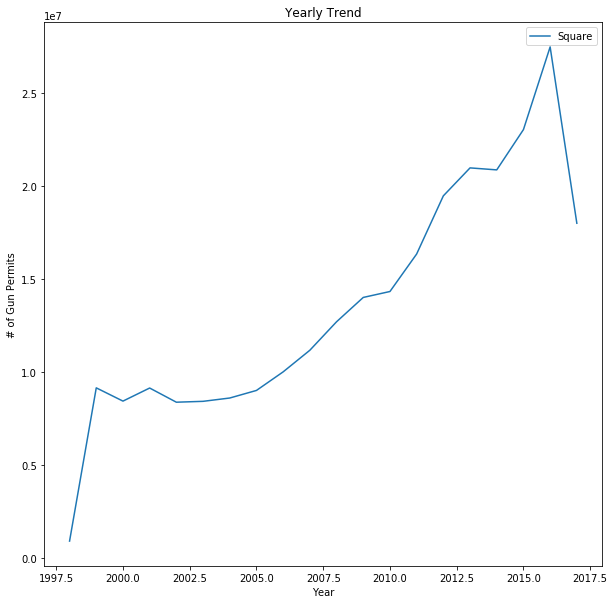

In [66]:
plt.figure(figsize=(10, 10))
x = year_trend_df['year']
y = year_trend_df['total_permits'] 
plt.xlabel("Year")
plt.ylabel("# of Gun Permits") 
plt.title("Yearly Trend")
plt.plot(x, y, label='Square')
plt.legend() 
plt.show()


### Research Question 2: Assess correlation between gun permits and census data fields e.g. per capita income, race etc.

In [67]:
census_df.reset_index(inplace=True)

In [68]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#1) Correlation between Per Capita Income of 2015 and number of gun permits in 2015
corr_gun_2015= pd.DataFrame({'total_permit_2015':gun_df[gun_df['year'] == 2015].groupby('state')['totals_updated'].sum()}
                           ).reset_index()
corr_gun_2015= corr_gun_2015.merge(census_df, left_on='state', right_on='index', how='inner')

corr_gun_2015= corr_gun_2015[['state', 'total_permit_2015', 'per_capita_income_2015']]

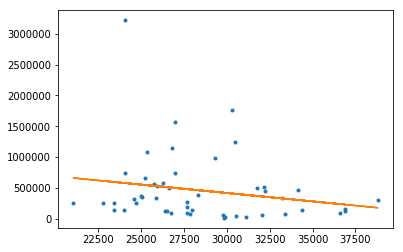

In [69]:
from numpy.polynomial.polynomial import polyfit

x = corr_gun_2015['per_capita_income_2015']
y = corr_gun_2015['total_permit_2015']

# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

In [70]:
# scatterplot for number of guns by races 
#1) Calculated numbers based on %s

population_by_race_df = census_df

In [71]:
population_by_race_df.head()

Fact,index,population_estimates,population_estimates_base_prior,population_percent_change,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hispanic_or_latino_percent,white_alone_not_hispanic_or_latino_percent,housing_units,per_capita_income_2015,median_household_income_2015
0,Alabama,4863300.0,4780131.0,0.017,0.060,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,2230185.0,24091.0,43623.0
1,Alaska,741894.0,710249.0,0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,310658.0,33413.0,72515.0
2,Arizona,6931071.0,6392301.0,0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,2961003.0,25848.0,50255.0
3,Arkansas,2988248.0,2916025.0,0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,1354762.0,22798.0,41371.0
4,California,39250017.0,37254522.0,0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,14060525.0,30318.0,61818.0


In [72]:
population_by_race_df['white_alone'] = round(population_by_race_df['white_alone_percent'] * 
                                             population_by_race_df['population_estimates'], 0)
population_by_race_df['black_or_african_american_alone'] = round(population_by_race_df['black_or_african_american_alone_percent'] *
                                                                population_by_race_df['population_estimates'], 0)
population_by_race_df['american_indian_and_alaska_native_alone'] = round(population_by_race_df['american_indian_and_alaska_native_alone_percent'] *
                                                                        population_by_race_df['population_estimates'], 0)
population_by_race_df['asian_alone'] = round(population_by_race_df['asian_alone_percent'] *
                                            population_by_race_df['population_estimates'], 0)
population_by_race_df['native_hawaiian_and_other_pacific_islander_alone'] = round(population_by_race_df['native_hawaiian_and_other_pacific_islander_alone_percent'] *
                                                                                 population_by_race_df['native_hawaiian_and_other_pacific_islander_alone_percent'], 0)
population_by_race_df['hispanic_or_latino'] = round(population_by_race_df['hispanic_or_latino_percent'] *
                                                   population_by_race_df['population_estimates'], 0)

In [73]:
population_by_race_df.head()

Fact,index,population_estimates,population_estimates_base_prior,population_percent_change,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,...,white_alone_not_hispanic_or_latino_percent,housing_units,per_capita_income_2015,median_household_income_2015,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,hispanic_or_latino
0,Alabama,4863300.0,4780131.0,0.017,0.060,0.226,0.161,0.516,0.693,0.268,...,0.658,2230185.0,24091.0,43623.0,3370267.0,1303364.0,34043.0,68086.0,0.0,204259.0
1,Alaska,741894.0,710249.0,0.045,0.073,0.252,0.104,0.477,0.661,0.038,...,0.612,310658.0,33413.0,72515.0,490392.0,28192.0,112768.0,46739.0,0.0,51933.0
2,Arizona,6931071.0,6392301.0,0.084,0.063,0.235,0.169,0.503,0.833,0.049,...,0.555,2961003.0,25848.0,50255.0,5773582.0,339622.0,374278.0,235656.0,0.0,2141701.0
3,Arkansas,2988248.0,2916025.0,0.025,0.064,0.236,0.163,0.509,0.794,0.157,...,0.729,1354762.0,22798.0,41371.0,2372669.0,469155.0,29882.0,47812.0,0.0,218142.0
4,California,39250017.0,37254522.0,0.054,0.063,0.232,0.136,0.503,0.727,0.065,...,0.377,14060525.0,30318.0,61818.0,28534762.0,2551251.0,667250.0,5809003.0,0.0,15268257.0


In [74]:
#lets remove unnecessary columns from dataframe
cols = population_by_race_df.columns[2:19]
population_by_race_df.drop(columns=cols, inplace=True)

In [75]:
population_by_race_df.head()

Fact,index,population_estimates,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,hispanic_or_latino
0,Alabama,4863300.0,3370267.0,1303364.0,34043.0,68086.0,0.0,204259.0
1,Alaska,741894.0,490392.0,28192.0,112768.0,46739.0,0.0,51933.0
2,Arizona,6931071.0,5773582.0,339622.0,374278.0,235656.0,0.0,2141701.0
3,Arkansas,2988248.0,2372669.0,469155.0,29882.0,47812.0,0.0,218142.0
4,California,39250017.0,28534762.0,2551251.0,667250.0,5809003.0,0.0,15268257.0


In [76]:
# Attach this dataframe to FBI Gun data and get total permits for 2016
race_corr_df = population_by_race_df.merge(gun_permit_2016_df, left_on='index', right_on='state', how='inner')

In [77]:
race_corr_df.head()

,index,population_estimates,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,hispanic_or_latino,year,state,total_permits_2016
0,Alabama,4863300.0,3370267.0,1303364.0,34043.0,68086.0,0.0,204259.0,2016,Alabama,617805
1,Alaska,741894.0,490392.0,28192.0,112768.0,46739.0,0.0,51933.0,2016,Alaska,88505
2,Arizona,6931071.0,5773582.0,339622.0,374278.0,235656.0,0.0,2141701.0,2016,Arizona,417137
3,Arkansas,2988248.0,2372669.0,469155.0,29882.0,47812.0,0.0,218142.0,2016,Arkansas,266872
4,California,39250017.0,28534762.0,2551251.0,667250.0,5809003.0,0.0,15268257.0,2016,California,2378025


In [78]:
# Drop unnecessary columns
race_corr_df.drop(columns=['year', 'state'], inplace=True)

In [79]:
race_corr_df.head()

,index,population_estimates,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,hispanic_or_latino,total_permits_2016
0,Alabama,4863300.0,3370267.0,1303364.0,34043.0,68086.0,0.0,204259.0,617805
1,Alaska,741894.0,490392.0,28192.0,112768.0,46739.0,0.0,51933.0,88505
2,Arizona,6931071.0,5773582.0,339622.0,374278.0,235656.0,0.0,2141701.0,417137
3,Arkansas,2988248.0,2372669.0,469155.0,29882.0,47812.0,0.0,218142.0,266872
4,California,39250017.0,28534762.0,2551251.0,667250.0,5809003.0,0.0,15268257.0,2378025


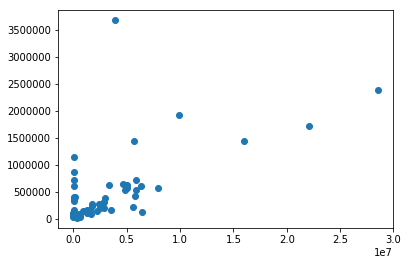

In [80]:
# plot scatter plot for all races
plt.scatter(x=race_corr_df['white_alone'], y=race_corr_df['total_permits_2016'])
plt.xlabel='Population White Alone'
plt.ylabel= 'Total Gun Permits'
plt.show()

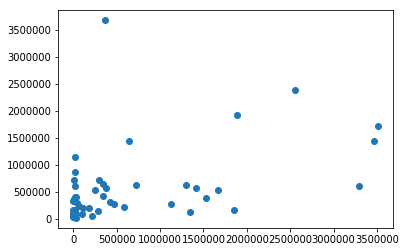

In [81]:
plt.scatter(x=race_corr_df['black_or_african_american_alone'], y=race_corr_df['total_permits_2016'])

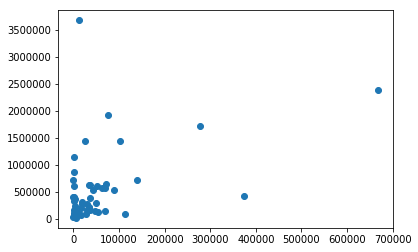

In [82]:
plt.scatter(x=race_corr_df['american_indian_and_alaska_native_alone'], y=race_corr_df['total_permits_2016'])

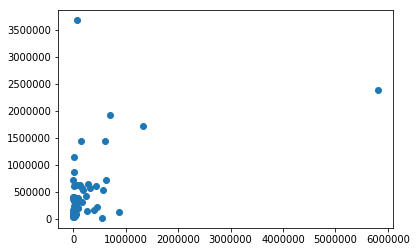

In [83]:
plt.scatter(x=race_corr_df['asian_alone'], y=race_corr_df['total_permits_2016'])

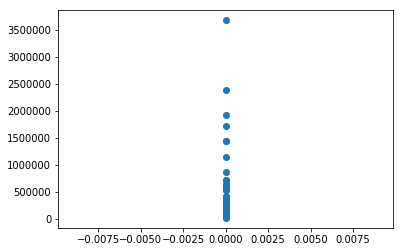

In [84]:
plt.scatter(x=race_corr_df['native_hawaiian_and_other_pacific_islander_alone'], y=race_corr_df['total_permits_2016'])

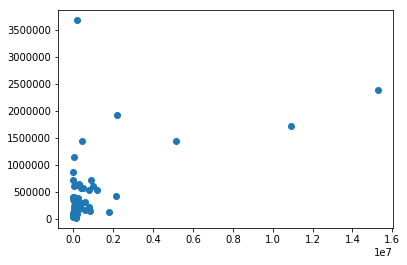

In [85]:
plt.scatter(x=race_corr_df['hispanic_or_latino'], y=race_corr_df['total_permits_2016'])

<a id='conclusions'></a>
## Conclusions

### Observations on FBI Gun data: 
Post data wrangling following observations were noted:
 - Based on the available data, it appears that Kentuky has highest number of permits in both 2006 and 2016. 
 - In 2006 Texas was second highest state to issue gun permits, where as in 2016 California was second highest state to issue gun permits
 - When comparing, none of the states experienced reduction in number of gun permits.
 - Considering percentage change, Marina Island experienced an increase of 2,551% over 2006.
 - Looking at year over year trend, the number of guns permits kept on increasing over the years. From 2016 to 2017 a decline in permits was observed.

### Correlation to US Census data:
Using available U.S. Census data, I tried to plot correlation between subset of census dimension and FBI gun data.I tried to plot correlation for following: 
 - **Per Capita Income v/s Total Gun permits:**
     - Basic scatter plot between Per Capita Income and Total Gun Permits (for year 2015) indicates negative correlation. However, we cannot conclude this relation due to lack of extensive assessment.  
     - Further research on R-squared, correlation coefficient will be required to confirm the relation. (R-squared and coefficient calculation are not scope of this project).

 - **Population of Different Races v/s Total Gun Permits:**
Further, I plotted various scatter plots between population of different races v/s total gun permits. All the scatter plots indicate positive correlation. Further research on R-squared, correlation coefficient will be required to confirm the relation. (R-squared and coefficient calculation are not scope of this project). 
 
 
 
 



> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [86]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0